# Data Analysis Mentor App 
### @Author: Carlos Figueredo Triana

### Data exploration
We can see that the data is formed by the column "Country" that has the short name of each country and the column "Users" that shows the number of users per country

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('mentorappswift-dev_Demographics_User location_2022-11-07.csv', skiprows=6, names=['Country', 'Users'])
df.head()

Country  Users
0     USA   1754
1      US    693
2      CO   2281
3      VE    453
4      CA    382

Here we can see an approach to the data:

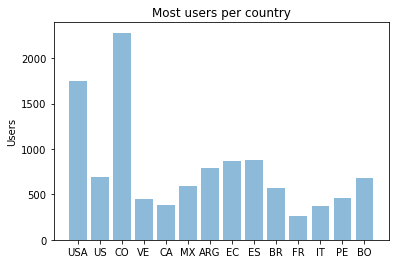

In [182]:
y_pos = np.arange(len(df['Country']))

plt.bar(y_pos, df['Users'], align='center', alpha=0.5)
plt.xticks(y_pos, df['Country'])
plt.ylabel('Users')
plt.title('Most users per country')

plt.show()

We are going to clean and organize the data for a better understanding:

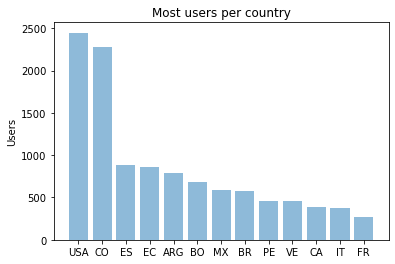

In [183]:
df['Country'] = df['Country'].replace(['US'], 'USA')
df = df.groupby('Country', as_index=False).sum()
df = df.sort_values('Users', ascending=False)


y_pos = np.arange(len(df['Country']))

plt.bar(y_pos, df['Users'], align='center', alpha=0.5)
plt.xticks(y_pos, df['Country'])
plt.ylabel('Users')
plt.title('Most users per country')

plt.show()

Let's take another perspective of the data:

<AxesSubplot:title={'center':'Points Scored by Team'}, ylabel='Users'>

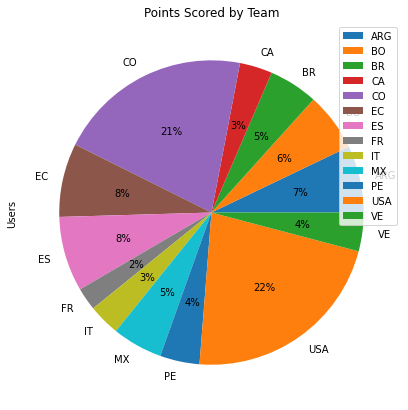

In [184]:
df.groupby('Country').sum().plot(kind='pie', y='Users', autopct='%1.0f%%',
                                title='Points Scored by Team', figsize=(7,7))

We are going to change the country names of those that are not United States or Colombia:

<AxesSubplot:title={'center':'Points Scored by Team'}, ylabel='Users'>

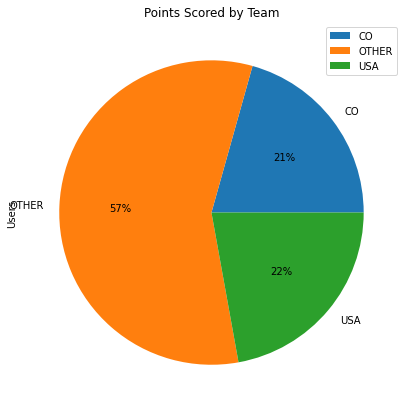

In [185]:
for value in df['Country']:
    if value != 'USA' and value != 'CO':
        df['Country'] = df['Country'].replace([value], 'OTHER')
df.groupby('Country').sum().plot(kind='pie', y='Users', autopct='%1.0f%%',
                                title='Points Scored by Team', figsize=(7,7))